## Building models with **paintbox**

In **paintbox**, the models used to describe the observed spectrum and/or spectral energy distribution of a galaxy are build from a combination of spectral components, including the stellar continuum, emission lines for the gas, etc. Moreover, the parametrization of the model, i.e., the specific details about how these spectral elements are combined, are defined interactively. Below, we illustrate how to generate these spectral components in practice and how to combine them to make a model.

### Using CvD models

Here we use the CvD single stellar popupation models, and the response functions for several elements, prepared in this [tutorial](https://paintbox.readthedocs.io/en/latest/preparing_models.html#preparing-cvd-models) to illustrate how to  create the basic elements for the stellar continuum.

In [19]:
import os

import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

import paintbox as pb

We first load the data from the CvD models, which are stored in a multi-extension FITS file, and we create an interpolate version of the SSP models.

Parameter names:  ['Z', 'Age', 'x1', 'x2']
Parameters for example: 
[0.21643    0.2184925  0.2215675  ... 0.13889    0.1391675  0.13927695]


Text(0, 0.5, 'Flux')

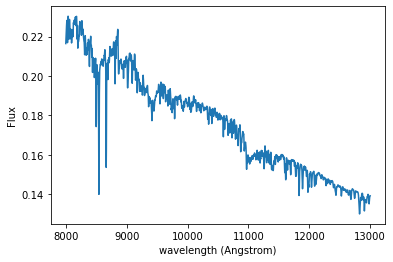

In [26]:
# Reading the content of the FITS file with SSP models
ssp_file = "templates/VCJ17_varydoublex.fits"
templates = fits.getdata(ssp_file, ext=0)
params = Table.read(ssp_file, hdu=1)
wave = Table.read(ssp_file, hdu=2)["wave"].data
# Use paintbox to create a component with interpolated SSP models
ssp = pb.ParametricModel(wave, params, templates)
# Name of the parameters are taken from the input table params
print("Parameter names: ", ssp.parnames)
# Model parameters 
p0 = np.array([0.1, 6, 2.3, 2.3])
print("Parameters for example: ", )
print(example_spectrum)
plt.plot(wave, ssp(p0), "-")
plt.xlabel("wavelength (Angstrom)")
plt.ylabel("Flux")